In [13]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [14]:
# Load dataset 
dataset = pd.read_csv('Fish2.csv')


In [15]:
subset_dataset = dataset.head(150)

In [16]:
# Pilih fitur yang akan digunakan
features = dataset[['Weight', 'Length', 'Height']]


In [17]:
# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [18]:
# Menentukan jumlah cluster (K)
k = 3

In [19]:
# Membuat dan menyesuaikan model K-means
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(features_scaled)


C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [20]:
# Menambahkan kolom cluster ke dataset
dataset['cluster'] = kmeans_model.labels_


In [21]:
kmeans_model.cluster_centers_

array([[ 1.09768732,  1.24520223, -0.85626517],
       [-0.69508105, -0.65050724, -0.36228293],
       [ 0.9394753 ,  0.72440054,  1.50457249]])

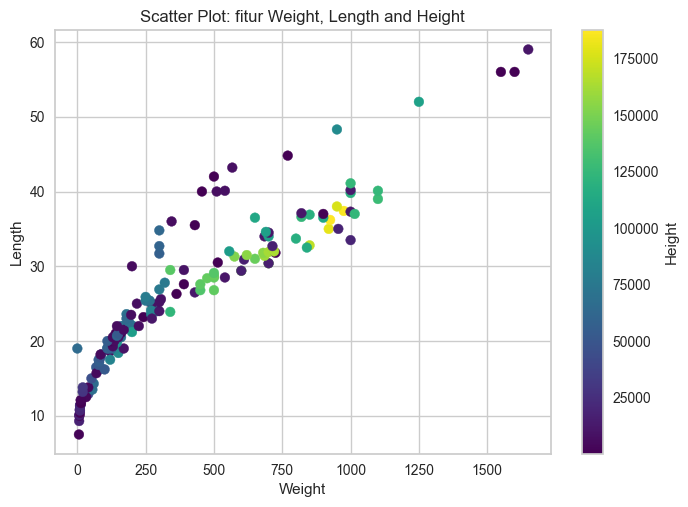

In [28]:
plt.scatter(dataset['Weight'],dataset['Length'], c=dataset['Height'], cmap='viridis', marker='o')

# Menambahkan label sumbu
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('Scatter Plot: fitur Weight, Length and Height')

# Menampilkan colorbar untuk variabel 'Height'
plt.colorbar(label='Height')

# Menampilkan plot
plt.show()

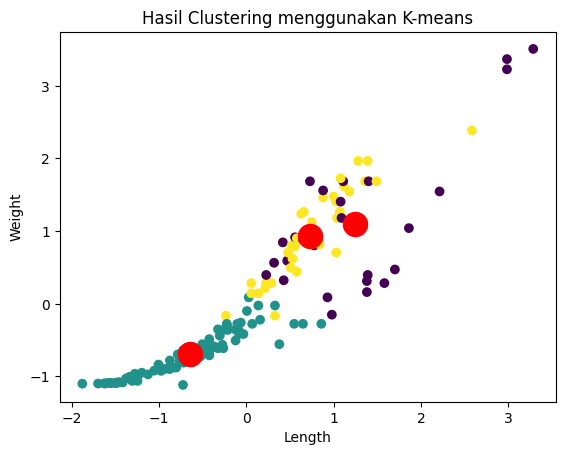

In [24]:
# Visualisasi hasil clustering menggunakan fitur 'Weight' dan 'Length'
plt.scatter(features_scaled[:, 1], features_scaled[:, 0], c=kmeans_model.labels_, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 0], s=300, c='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Hasil Clustering menggunakan K-means')
plt.show()


C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

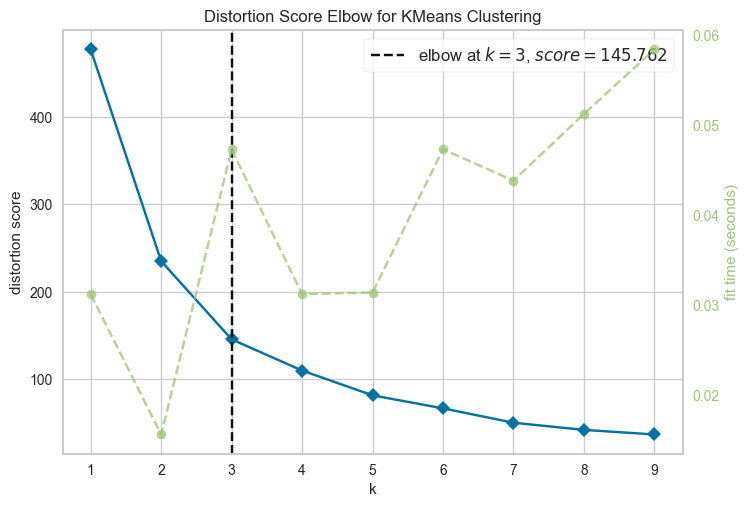

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer  # Install dengan pip install yellowbrick





# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Gunakan metode Elbow untuk menentukan jumlah cluster optimal
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(features_scaled)  # Fit the data to the visualizer
visualizer.show()  # Menampilkan visualisasi

# Alternatif: Gunakan metode inertia untuk menentukan jumlah cluster
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(features_scaled)
#     inertia.append(kmeans.inertia_)
# plt.plot(range(1, 11), inertia, marker='o')
# plt.xlabel('Jumlah Cluster (K)')
# plt.ylabel('Inertia')
# plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Pilih fitur yang akan digunakan
features = df[['Weight', 'Length', 'Height']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Gunakan metode inertia untuk menentukan jumlah cluster optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot nilai inertia untuk berbagai jumlah cluster (K)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Inertia untuk Menentukan Jumlah Cluster Optimal')
plt.show()


NameError: name 'df' is not defined

In [ ]:
# cara mebuat plot 3d

from mpl_toolkits.mplot3d import Axes3D  # Import modul Axes3D

# Pastikan Anda sudah mengganti 'x_train' dan 'kmean' dengan variabel yang sesuai

# Membuat objek figure dengan ukuran 10x5 dan proyeksi 3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk data x_train dengan warna berdasarkan label klaster
scatter = ax.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_, cmap='rainbow')

# Scatter plot untuk pusat klaster dengan bintang
centroid = ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], [0]*len(kmean.cluster_centers_), marker='*', s=150, c='blue', label='Centroids')

# Menambahkan label sumbu dan judul
ax.set_xlabel('Weight')
ax.set_ylabel('Length')
ax.set_zlabel('Height')
plt.title('K-Means Clustering')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

NameError: name 'plt' is not defined

C:\Users\62852\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


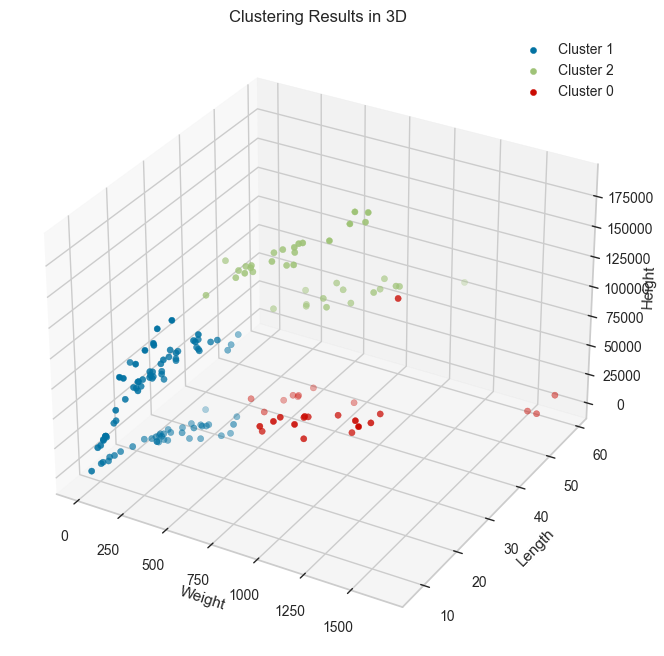

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Baca data


# Pilih fitur yang akan digunakan


# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Lakukan K-means clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi hasil clustering dalam plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot setiap cluster dengan warna yang berbeda
for cluster_id in dataset['Cluster'].unique():
    cluster_data = dataset[dataset['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Weight'], cluster_data['Length'], cluster_data['Height'], label=f'Cluster {cluster_id}')

ax.set_xlabel('Weight')
ax.set_ylabel('Length')
ax.set_zlabel('Height')
ax.set_title('Clustering Results in 3D')
ax.legend()

plt.show()